In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

url = 'D:\\__Max__\\Documents\\Machine Learning Course LANIA\\Recursos complementarios-20210804\\Datasets\\Folds5x2_pp.xlsx'
Df1 = pd.read_excel(url, sheet_name='Sheet1', header=0)
Df1.shape

(9568, 5)

In [70]:
Df2 = pd.read_excel(url, sheet_name='Sheet2', header=0)
Df3 = pd.read_excel(url, sheet_name='Sheet3', header=0)
Df2.shape

(9568, 5)

In [71]:
Df3.shape

(9568, 5)

In [72]:
energy=pd.concat([Df1, Df2, Df3])
energy.describe()

,AT,V,AP,RH,PE
count,28704.000000,28704.000000,28704.000000,28704.000000,28704.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452214,12.707450,5.938577,14.599760,17.066400
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [73]:
mask = energy['PE'] > 454.365009
energy[mask]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
2,5.11,39.40,1012.16,92.14,488.56
4,10.82,37.50,1009.23,96.62,473.90
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
...,...,...,...,...,...
9560,10.62,39.58,1011.90,87.85,479.91
9564,9.61,44.03,1008.30,91.36,473.54
9565,14.41,40.83,1009.82,80.43,470.13
9566,14.11,45.08,1023.27,83.22,464.70


In [74]:
energy.loc[energy['PE']>454.365009]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
2,5.11,39.40,1012.16,92.14,488.56
4,10.82,37.50,1009.23,96.62,473.90
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
...,...,...,...,...,...
9560,10.62,39.58,1011.90,87.85,479.91
9564,9.61,44.03,1008.30,91.36,473.54
9565,14.41,40.83,1009.82,80.43,470.13
9566,14.11,45.08,1023.27,83.22,464.70


In [103]:
features = energy.iloc[:,0:4]
target = energy['PE']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

In [104]:
print('Número de instancias de entrenamiento: '+str(len(x_train)))
print('Número de instancias de prueba: '+str(len(x_test)))
print('Número de instancias de totales: '+str(len(energy.index)))

Número de instancias de entrenamiento: 22963
Número de instancias de prueba: 5741
Número de instancias de totales: 28704


In [105]:
LR = LinearRegression()
LR.fit(x_train, y_train)
prediccion_entrenamiento = LR.predict(x_test)
mse = mean_squared_error(y_true = y_test, y_pred = prediccion_entrenamiento)
rmse = np.sqrt(mse)
r2 = LR.score(x_test, y_test)
print('mse = '+str(mse))
print('rmse = '+str(rmse))
print('r2 = '+str(R2))

mse = 20.749639619654438
rmse = 4.555177232518449
r2 = 0.9968265192780212


In [116]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=7)
dt = dt.fit(x_train,y_train)
pred_test = dt.predict(x_test)
pred_test

array([446.83581967, 466.4305102 , 451.97357143, ..., 438.13907285,
       477.7320894 , 430.95858038])

In [117]:
R2 = dt.score(x_test, y_test)
MSE = mean_squared_error(y_true=y_test, y_pred = pred_test)
RMSE = np.sqrt(MSE)
print('MSE = '+str(MSE))
print('RMSE = '+str(RMSE))
print('R2 = '+str(R2))

MSE = 15.25161506585242
RMSE = 3.905331620471227
R2 = 0.9471624235618843


In [118]:
importances = pd.DataFrame({'Característica':x_train.columns, 'Importancia':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('Importancia', ascending=False)
importances

,Característica,Importancia
0,AT,0.942
1,V,0.044
2,AP,0.007
3,RH,0.007


https://datascience.stackexchange.com/questions/54214/attributeerror-numpy-ndarray-object-has-no-attribute-columns
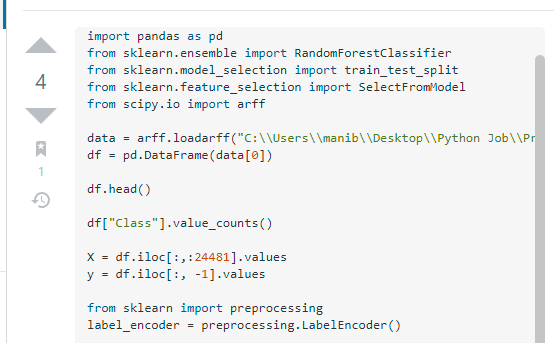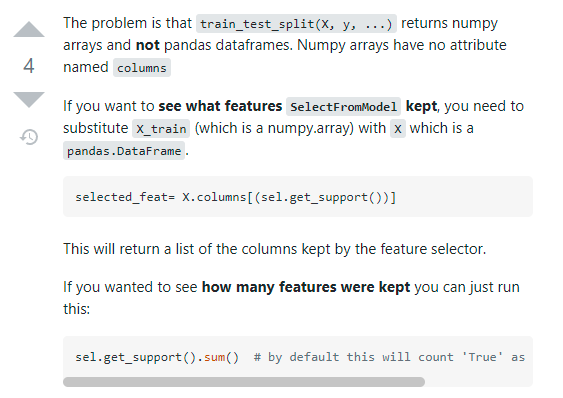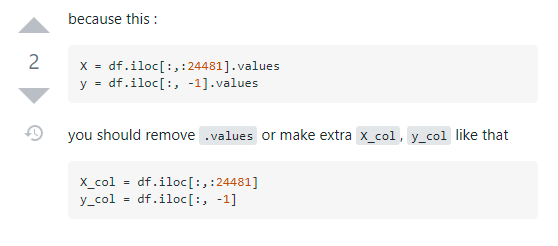

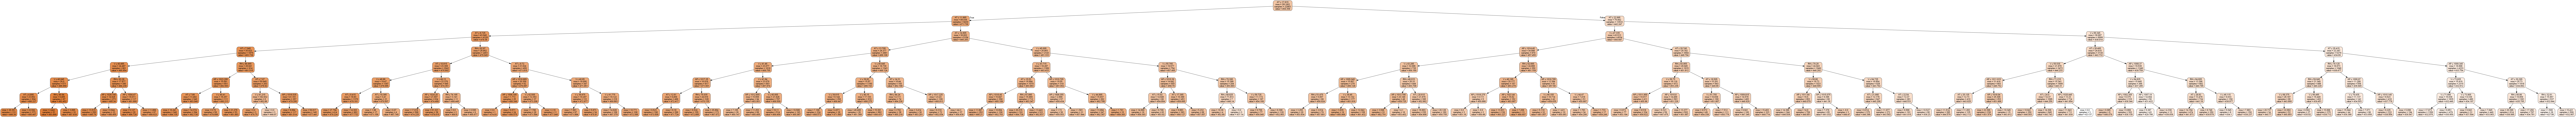

In [119]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names= x_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('energy.png')
Image(graph.create_png())